In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

BATCH_SIZE = 32

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2021-12-23 18:55:20.272438: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-23 18:55:20.272568: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2021-12-23 18:55:20.332616: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-23 18:55:20.332775: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


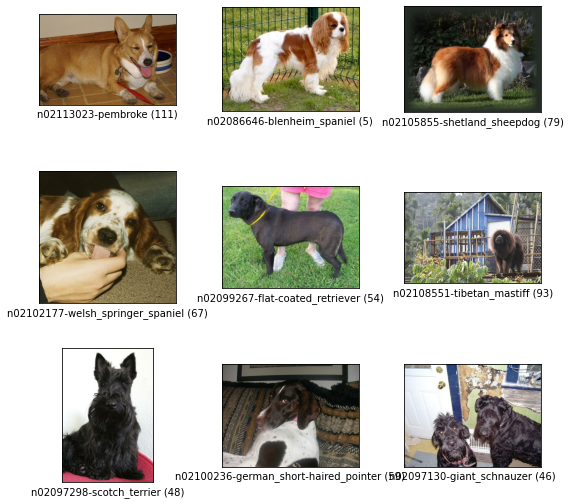

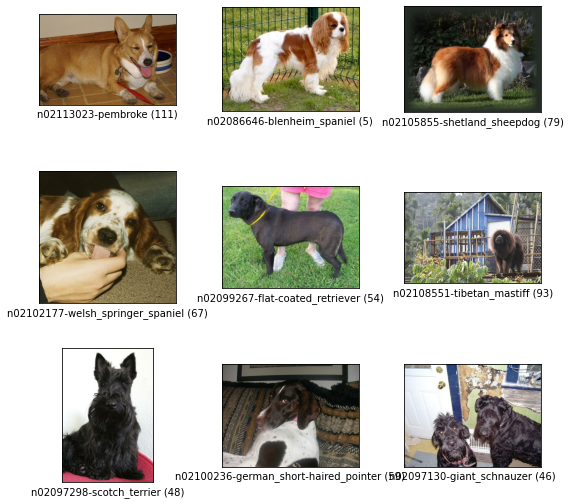

In [3]:
tfds.show_examples(ds_train, ds_info)

In [4]:
def normalize_and_resize_img(image, label):
    # Normalizes images: `uint8` -> `float32`
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label


def 전처리_함수(image, label):   # 변환할 이미지와 라벨  
    # 이미지 변환 로직 적용  
    new_image = 이미지_변환(image)  
    return new_image, label  

In [5]:
def augment(image,label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.clip_by_value(image, 0, 1)
    return image, label


In [6]:
# 데이터셋(ds)을 가공하는 메인함수
def apply_normalize_on_dataset(ds, is_test=False, batch_size=BATCH_SIZE, with_aug=False):
    ds = ds.map(
        normalize_and_resize_img,  # 기본적인 전처리 함수 적용
        num_parallel_calls=2
    )
    if not is_test and with_aug:
        ds = ds.map(
            augment,       # augment 함수 적용
            num_parallel_calls=2
        )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds


In [7]:
def augment2(image,label):
    image = tf.image.central_crop(image, np.random.uniform(0.50, 1.00))
    image = tf.image.resize(image, [224, 224])
    return image, label

In [8]:
num_classes = ds_info.features["label"].num_classes

print(num_classes)
resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('=3')

120
=3


In [9]:
aug_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('=3')

=3


In [27]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)
ds_train_no_aug = apply_normalize_on_dataset(ds_train, with_aug=False)
ds_train_aug = apply_normalize_on_dataset(ds_train, with_aug=True)
ds_test = apply_normalize_on_dataset(ds_test, is_test=True)
print('=3')

=3


In [28]:
#EPOCH = 20  # Augentation 적용 효과를 확인하기 위해 필요한 epoch 수
EPOCH = 6

resnet50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

aug_resnet50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)




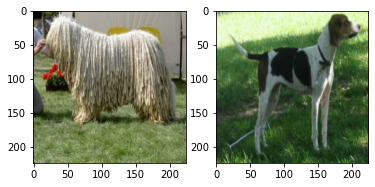

In [12]:
import matplotlib.pyplot as plt
from random import *


# 데이터셋에서 이미지 2개를 가져옵니다. 
for i, (image, label) in enumerate(ds_train_no_aug.take(1)):
    if i == 0:
        image_a = image[0]
        image_b = image[1]
        label_a = label[0]
        label_b = label[1]
        break

plt.subplot(1,2,1)
plt.imshow(image_a)

plt.subplot(1,2,2)
plt.imshow(image_b)

plt.show()

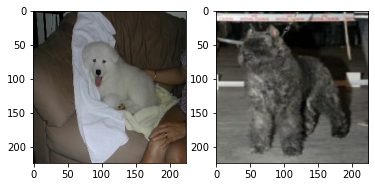

In [13]:
import matplotlib.pyplot as plt

# 데이터셋에서 이미지 2개를 가져옵니다. 
for i, (image, label) in enumerate(ds_train_no_aug.take(1)):
    if i == 0:
        image_a = image[0]
        image_b = image[1]
        label_a = label[0]
        label_b = label[1]
        break

plt.subplot(1,2,1)
plt.imshow(image_a)

plt.subplot(1,2,2)
plt.imshow(image_b)

plt.show()



In [14]:
def get_clip_box(image_a, image_b):
    # image.shape = (height, width, channel)
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0]
    
    # get center of box
    x = tf.cast(randrange(0,image_size_x), tf.int32)
    y = tf.cast(randrange(0,image_size_y), tf.int32)

    print(x)
    print(y)

    # get width, height of box

    #tf.cast(image_size_x*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    width = tf.cast(image_size_x*tf.math.sqrt(1-uniform(0,1)), tf.int32)
    height = tf.cast(image_size_y*tf.math.sqrt(1-uniform(0,1)), tf.int32)
    
    # clip box in image and get minmax bbox
    x_min = tf.math.maximum(0, x-width//2)
    y_min = tf.math.maximum(0, y-height//2)
    x_max = tf.math.minimum(image_size_x, x+width//2)
    y_max = tf.math.minimum(image_size_y, y+width//2)
    
    return x_min, y_min, x_max, y_max



tf.Tensor(128, shape=(), dtype=int32)
tf.Tensor(58, shape=(), dtype=int32)
(224, 224, 3)


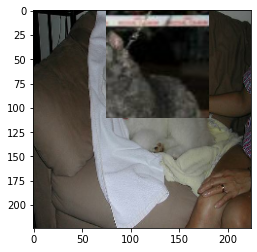

In [15]:
# mix two images
#일부분이 네모낳게 섞임.
def mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    middle_left = image_a[y_min:y_max, 0:x_min, :] # image_b의 왼쪽 바깥 영역
    middle_center = image_b[y_min:y_max, x_min:x_max, :]  # image_b의 안쪽 영역
    middle_right = image_a[y_min:y_max, x_max:image_size_x, :] # image_b의 오른쪽 바깥 영역
    middle = tf.concat([middle_left,middle_center,middle_right], axis=1)
    top = image_a[0:y_min, :, :]
    bottom = image_a[y_max:image_size_y, :, :]
    mixed_img = tf.concat([top, middle, bottom],axis=0)
    
    return mixed_img


x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)

#print('x : ', x_min, x_max)
#print('y : ', y_min, y_max)

mixed_img = mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max)
print(mixed_img.shape)
plt.imshow(mixed_img.numpy())
plt.show()

In [16]:
#이미지를 섞은 비율만큼 라벨도 섞어야한다.
# mix two labels
def mix_2_label(image_a, label_a, label_b, xa, ya, xb, yb, num_classes=120): #수정
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    mixed_area = (xb-xa)*(yb-ya)
    total_area = image_size_x*image_size_y
    a = tf.cast(mixed_area/total_area, tf.float32)

    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_label = (1-a)*label_a + a*label_b

    return mixed_label

mixed_label = mix_2_label(image_a, label_a, label_b, x_min, y_min, x_max, y_max)
mixed_label

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.     

In [17]:
def cutmix(image, label, prob = 1.0, batch_size=BATCH_SIZE, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(uniform(0, batch_size),tf.int32)
        image_b = image[j]
        label_b = label[j]
        xa, ya, xb, yb = get_clip_box(image_a, image_b)
        mixed_imgs.append(mix_2_images(image_a, image_b, xa, ya, xb, yb))
        mixed_labels.append(mix_2_label(image_a, label_a, label_b, xa, ya, xb, yb)) #수정

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs),(batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels),(batch_size, num_classes))
    return mixed_imgs, mixed_labels

In [18]:
num_classes = ds_info.features["label"].num_classes
print(num_classes)

120


tf.Tensor(0.66749805, shape=(), dtype=float32)
tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.66749805 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

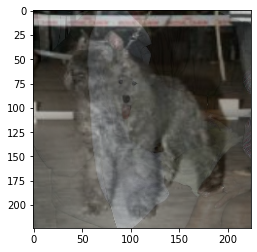

In [19]:
# function for mixup
# 투명도처럼 사진이 겹침.
def mixup_2_images(image_a, image_b, label_a, label_b, num_classes=120):
    #a = tf.random.uniform([],0,1)
    a = tf.cast(uniform(0,1),tf.float32)
    print(a)
    
    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_image= (1-a)*image_a + a*image_b
    mixed_label = (1-a)*label_a + a*label_b
    
    return mixed_image, mixed_label

mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
plt.imshow(mixed_img.numpy())
print(mixed_label)

In [20]:
def mixup(image, label, prob=1.0, batch_size=BATCH_SIZE, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(uniform(0,batch_size), tf.int32)
        image_b = image[j]
        label_b = label[j]
        mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
        mixed_imgs.append(mixed_img)
        mixed_labels.append(mixed_label)

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels


순서 주의점  
컷믹스는 배치크기 안에서만 섞는거기때문에 배치를 만들나서 해야한다.  
배치함수 실행후 컷믹스 해야함.  


In [21]:
def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label

def augment(image,label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    return image,label

AUTO = tf.data.experimental.AUTOTUNE

def onehot(image,label):
    CLASSES = 120
    return image, tf.one_hot(label,CLASSES)

def apply_normalize_on_dataset_cutmix(ds, is_test=False, batch_size=BATCH_SIZE, with_cutmix=False):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=2
    )

    ds = ds.batch(batch_size)
    if not is_test and with_cutmix:
        ds = ds.map(
            cutmix,
            num_parallel_calls=2
        )
    else:
        ds = ds.map(
            onehot,
            num_parallel_calls=2
        )
        

    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

# 데이터셋(ds)을 가공하는 메인함수
def apply_normalize_on_dataset(ds, is_test=False, batch_size=BATCH_SIZE, with_aug=False):
    ds = ds.map(
        normalize_and_resize_img,  # 기본적인 전처리 함수 적용
        num_parallel_calls=2
    )
    if not is_test and with_aug:
        ds = ds.map(
            augment,       # augment 함수 적용
            num_parallel_calls=2
        )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds


def apply_normalize_on_dataset_mixup(ds, is_test=False, batch_size=BATCH_SIZE, with_mixup=False):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=2
    )
    
    ds = ds.batch(batch_size)
    if not is_test and with_mixup:
        ds = ds.map(
            mixup,
            num_parallel_calls=2
        )
    else:
        ds = ds.map(
            onehot,
            num_parallel_calls=2
        )
        

    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [22]:
resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

aug_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)


In [23]:
#ds_train_no_aug = apply_normalize_on_dataset(ds_train, with_aug=False)

(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
    as_supervised=True
)

ds_train_CutMix = apply_normalize_on_dataset_cutmix(ds_train, with_cutmix= True)
ds_test_CutMix = apply_normalize_on_dataset_cutmix(ds_test, is_test=True,with_cutmix= True)

(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
    as_supervised=True
)

ds_train_MixUp = apply_normalize_on_dataset_mixup(ds_train, with_mixup = True)
ds_test_MixUp = apply_normalize_on_dataset_mixup(ds_test, is_test=True, with_mixup = True)


Tensor("Cast_1/x:0", shape=(), dtype=int32)
Tensor("Cast_2/x:0", shape=(), dtype=int32)
Tensor("Cast_7/x:0", shape=(), dtype=int32)
Tensor("Cast_8/x:0", shape=(), dtype=int32)
Tensor("Cast_13/x:0", shape=(), dtype=int32)
Tensor("Cast_14/x:0", shape=(), dtype=int32)
Tensor("Cast_19/x:0", shape=(), dtype=int32)
Tensor("Cast_20/x:0", shape=(), dtype=int32)
Tensor("Cast_25/x:0", shape=(), dtype=int32)
Tensor("Cast_26/x:0", shape=(), dtype=int32)
Tensor("Cast_31/x:0", shape=(), dtype=int32)
Tensor("Cast_32/x:0", shape=(), dtype=int32)
Tensor("Cast_37/x:0", shape=(), dtype=int32)
Tensor("Cast_38/x:0", shape=(), dtype=int32)
Tensor("Cast_43/x:0", shape=(), dtype=int32)
Tensor("Cast_44/x:0", shape=(), dtype=int32)
Tensor("Cast_49/x:0", shape=(), dtype=int32)
Tensor("Cast_50/x:0", shape=(), dtype=int32)
Tensor("Cast_55/x:0", shape=(), dtype=int32)
Tensor("Cast_56/x:0", shape=(), dtype=int32)
Tensor("Cast_61/x:0", shape=(), dtype=int32)
Tensor("Cast_62/x:0", shape=(), dtype=int32)
Tensor("Cast_6

In [24]:
print(ds_train_CutMix)
print(ds_test_CutMix)

<PrefetchDataset shapes: ((32, 224, 224, 3), (32, 120)), types: (tf.float32, tf.float32)>
<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.float32)>


In [25]:
num_classes = ds_info.features["label"].num_classes
resnet50_CutMix = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
resnet50_MixUp = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])

resnet50_CutMix.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

resnet50_MixUp.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)



In [26]:

history_resnet50_CutMix = resnet50_CutMix.fit(
    ds_train_CutMix, # augmentation 적용하지 않은 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test_CutMix,
    verbose=1,
    use_multiprocessing=True,
)

history_resnet50_MixUp = resnet50_MixUp.fit(
    ds_train_MixUp, # augmentation 적용한 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test_MixUp,
    verbose=1,
    use_multiprocessing=True,
)


)

Epoch 1/6


2021-12-23 18:55:32.607963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - ETA: 0s - loss: 4.0549 - accuracy: 0.1702

2021-12-23 18:57:31.858838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 146s 378ms/step - loss: 4.0549 - accuracy: 0.1702 - val_loss: 4.9902 - val_accuracy: 0.0052
Epoch 2/6
375/375 [==============================] - 146s 389ms/step - loss: 3.0473 - accuracy: 0.3936 - val_loss: 3.2302 - val_accuracy: 0.2302
Epoch 3/6
375/375 [==============================] - 143s 380ms/step - loss: 2.7322 - accuracy: 0.4794 - val_loss: 1.3100 - val_accuracy: 0.6424
Epoch 4/6
375/375 [==============================] - 142s 378ms/step - loss: 2.5233 - accuracy: 0.5486 - val_loss: 1.1674 - val_accuracy: 0.6905
Epoch 5/6
375/375 [==============================] - 144s 384ms/step - loss: 2.3662 - accuracy: 0.5940 - val_loss: 1.1041 - val_accuracy: 0.7010
Epoch 6/6
375/375 [==============================] - 148s 396ms/step - loss: 2.2735 - accuracy: 0.6186 - val_loss: 1.3166 - val_accuracy: 0.6504
Epoch 1/6


2021-12-23 19:10:01.087199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - ETA: 0s - loss: 4.0562 - accuracy: 0.1867

2021-12-23 19:12:04.842486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 151s 392ms/step - loss: 4.0562 - accuracy: 0.1867 - val_loss: 5.0360 - val_accuracy: 0.0058
Epoch 2/6
375/375 [==============================] - 146s 388ms/step - loss: 3.1726 - accuracy: 0.4214 - val_loss: 3.4067 - val_accuracy: 0.2140
Epoch 3/6
375/375 [==============================] - 145s 386ms/step - loss: 2.8933 - accuracy: 0.5172 - val_loss: 1.5298 - val_accuracy: 0.6021
Epoch 4/6
375/375 [==============================] - 138s 369ms/step - loss: 2.7478 - accuracy: 0.5802 - val_loss: 1.2864 - val_accuracy: 0.6642
Epoch 5/6
375/375 [==============================] - 138s 369ms/step - loss: 2.6355 - accuracy: 0.6241 - val_loss: 1.2641 - val_accuracy: 0.6579
Epoch 6/6
375/375 [==============================] - 139s 370ms/step - loss: 2.5607 - accuracy: 0.6450 - val_loss: 1.1429 - val_accuracy: 0.6972
Epoch 1/6


ValueError: in user code:

    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/keras/engine/training.py:788 train_step
        loss = self.compiled_loss(
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/keras/losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/woogyuchoi/miniforge3/envs/tf2/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 120) are incompatible


In [30]:
history_resnet50_no_aug = resnet50.fit(
    ds_train_no_aug, # augmentation 적용하지 않은 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

history_resnet50_aug = aug_resnet50.fit(
    ds_train_aug, # augmentation 적용한 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/6


2021-12-23 19:33:13.417331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - ETA: 0s - loss: 2.4911 - accuracy: 0.4272

2021-12-23 19:35:07.157131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 140s 365ms/step - loss: 2.4911 - accuracy: 0.4272 - val_loss: 5.0352 - val_accuracy: 0.0103
Epoch 2/6
375/375 [==============================] - 139s 370ms/step - loss: 0.8889 - accuracy: 0.7620 - val_loss: 2.8204 - val_accuracy: 0.2983
Epoch 3/6
375/375 [==============================] - 139s 371ms/step - loss: 0.4239 - accuracy: 0.9039 - val_loss: 1.0258 - val_accuracy: 0.7002
Epoch 4/6
375/375 [==============================] - 139s 371ms/step - loss: 0.2021 - accuracy: 0.9677 - val_loss: 0.9287 - val_accuracy: 0.7235
Epoch 5/6
375/375 [==============================] - 138s 367ms/step - loss: 0.1023 - accuracy: 0.9895 - val_loss: 0.9112 - val_accuracy: 0.7383
Epoch 6/6
375/375 [==============================] - 138s 368ms/step - loss: 0.0616 - accuracy: 0.9959 - val_loss: 0.9143 - val_accuracy: 0.7374
Epoch 1/6


2021-12-23 19:47:06.496758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - ETA: 0s - loss: 2.5268 - accuracy: 0.4115

2021-12-23 19:49:02.043373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 142s 367ms/step - loss: 2.5268 - accuracy: 0.4115 - val_loss: 4.9249 - val_accuracy: 0.0059
Epoch 2/6
375/375 [==============================] - 137s 366ms/step - loss: 1.0000 - accuracy: 0.7240 - val_loss: 2.6277 - val_accuracy: 0.3282
Epoch 3/6
375/375 [==============================] - 139s 372ms/step - loss: 0.5875 - accuracy: 0.8425 - val_loss: 1.0723 - val_accuracy: 0.6859
Epoch 4/6
375/375 [==============================] - 147s 391ms/step - loss: 0.3994 - accuracy: 0.8982 - val_loss: 0.9652 - val_accuracy: 0.7098
Epoch 5/6
375/375 [==============================] - 147s 393ms/step - loss: 0.2420 - accuracy: 0.9471 - val_loss: 0.9459 - val_accuracy: 0.7233
Epoch 6/6
375/375 [==============================] - 147s 393ms/step - loss: 0.1533 - accuracy: 0.9717 - val_loss: 0.9332 - val_accuracy: 0.7310


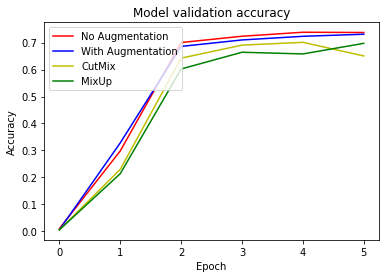

In [32]:
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_aug.history['val_accuracy'], 'b')
plt.plot(history_resnet50_CutMix.history['val_accuracy'], 'y')
plt.plot(history_resnet50_MixUp.history['val_accuracy'], 'g')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Augmentation','CutMix','MixUp'], loc='upper left')
plt.show()

# 회고

tf1 식 문법때문에 정상작동하지 않는부분.  
tf.uniform 을 기본 랜덤함수로 변환하였음.  
  
ds = ds.batch(batch_size) 를 거치면 원본 데이터의 변형이 일어남  
그래서 apply 함수를 호출전에 미리 매번 새로 불러줌.  
라벨은 as_supervised=True 옵션을 넣어 불려야함.
  
fit 에서 입력데이터셋과 테스트 데이터셋을 데이터 가공에 따라 매칭함.  
실수형 라벨 테스트셋에는  categorical_crossentropy 적용.


컷믹스나 믹스업을 하면 정확도가 떨어진다.
오버피팅  확증 편향에 같힐 확율이 내려간다.